# Regression Analysis on Appliances Energy Prediction Data

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).

##### Regression Analysis will be used to analyse the data using "Appliances" as the target variable

As usual, let us import the libraries that will be needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rc('figure', figsize=(20,10))

The data will be imported using pandas library from the local directory

In [2]:
energy_data = pd.read_csv('energydata_complete.csv')
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
energy_data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


Correlation coefficients between variables will be checked to determine the presence of multicollinearity

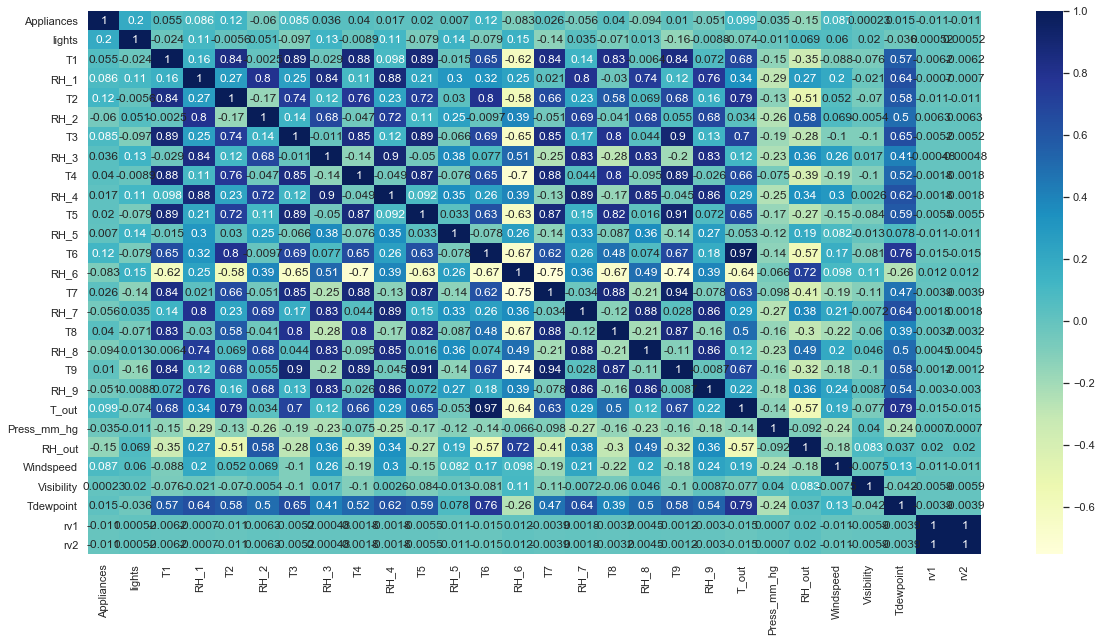

In [4]:
cor = energy_data.corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

It can be seen from the above that there are features that are highly correlated. Ridge and Lasso regression deals with multicoliinearity better than OLS. So, we will try the three methods.

Before the analysis begins proper, I will drop the columns that are not useful in the analysis which are "date" and "lights".

In [5]:
energy_data = energy_data.drop(['date', 'lights'], axis=1)
energy_data.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Let us standardize the data before analyzing. Then the target and features will be specified from the normalized data

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_data = pd.DataFrame(scaler.fit_transform(energy_data), columns=energy_data.columns)
X = normalised_data.drop(['Appliances'], axis=1)
Y = normalised_data['Appliances']

The data will then be divided into train and test sets. 70% of the data will be used to train the models whole 30% will be used to test the data.

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42 )

Yipee! We are done with the preprocessing, let us go into the analysis. We will use OLS, Ridge and Lasso Regression to analyze the data.

### OLS Regression

In [8]:
# We will use the LinearRegression class from sklearn to fit the model
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
#fit the model to the training dataset
linear_reg.fit(x_train, y_train)
#obtain OLS predictions
linear_predicted = linear_reg.predict(x_test)

##### Evaluation of the OLS model

I evaluated the model using three different criteria which the Mean Absolute Error (MAE), the Root Mean Square and the Coefficient of Determination $(R^2)$

In [9]:
from sklearn.metrics import mean_absolute_error
mae_linear = mean_absolute_error(y_test, linear_predicted)
round(mae_linear, 3)

0.05

In [10]:
from sklearn.metrics import mean_squared_error
rmse_linear = np.sqrt(mean_squared_error(y_test, linear_predicted))
round(rmse_linear, 3)

0.088

In [11]:
from sklearn.metrics import r2_score
r2_linear = r2_score(y_test, linear_predicted)
round(r2_linear, 3)

0.149

### Ridge Regression

In [12]:
# Import Ridge from sklearn.linear_model
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha= 0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [13]:
#obtain ridge predictions
ridge_predicted = ridge_reg.predict(x_test)

##### Evaluation of Ridge Regression

In [14]:
mae_ridge = mean_absolute_error(y_test, ridge_predicted)
round(mae_ridge, 3)

0.05

In [15]:
rmse_ridge = np.sqrt(mean_squared_error(y_test, ridge_predicted))
round(rmse_ridge, 3)

0.088

In [16]:
from sklearn.metrics import r2_score
r2_ridge = r2_score(y_test, ridge_predicted)
round(r2_ridge, 3)

0.148

### Lasso Regression

In [17]:
# Import Lasso regression from sklearn
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha= 0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
#obtain Lasso predictions
lasso_predicted = lasso_reg.predict(x_test)

##### Evaluation of Lasso Regression

In [19]:
mae_lasso = mean_absolute_error(y_test, lasso_predicted)
round(mae_lasso, 3)

0.055

In [20]:
rmse_lasso = np.sqrt(mean_squared_error(y_test, lasso_predicted))
round(rmse_lasso, 3)

0.094

In [21]:
from sklearn.metrics import r2_score
r2_lasso = r2_score(y_test, lasso_predicted)
round(r2_lasso, 3)

0.027

I created a table to view the features with their corresponding coefficients for the three models.

In [22]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features' , col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = get_weights_df(linear_reg, x_train, 'Linear Model Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on = 'Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on = 'Features' )
final_weights

,Features,Linear Model Weight,Ridge Weight,Lasso weight
0,RH_2,-0.456698,-0.401134,-0.000000
1,T_out,-0.321860,-0.250765,0.000000
2,T2,-0.236178,-0.193880,0.000000
3,T9,-0.189941,-0.188584,-0.000000
4,RH_8,-0.157595,-0.156596,-0.000110
5,RH_out,-0.077671,-0.050541,-0.049557
6,RH_7,-0.044614,-0.046291,-0.000000
7,RH_9,-0.039800,-0.041701,-0.000000
8,T5,-0.015657,-0.020727,-0.000000
9,T1,-0.003281,-0.021549,0.000000


Let us see the performance of the three models

In [23]:
compare = pd.DataFrame(['OLS', 'Ridge', 'Lasso'], columns=['Models'])
compare['Mean Absolute Error'] = [mae_linear, mae_ridge, mae_lasso]
compare['RMSE'] = [rmse_linear, rmse_ridge, rmse_lasso]
compare['Coefficient of Determination ($R^2$)'] = [r2_linear, r2_ridge, r2_lasso]
compare

,Models,Mean Absolute Error,RMSE,Coefficient of Determination ($R^2$)
0,OLS,0.050134,0.087514,0.148902
1,Ridge,0.050082,0.087541,0.148382
2,Lasso,0.055257,0.093582,0.026801


#### Thank you!